# Theoretical Modelling Analysis
This script will be used to generate plots for my thesis, in particular I'll generate each of the plots i need for the theoretical modelling analysis. This should be versatile enough to work for the ZFOURGE observational (semi-empirical) models, and the pure theoretical models.

In [89]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
# Choose if you want to save the plots
save_figures = False

In [91]:
# We would like to investigate the effects of the different filters.
# Read in the dataframe

template_set_name = 'Brown'
agn_model_name = 'Type1AGN'

composite_choice = f'{template_set_name}_theoretical_composite_fluxes_{agn_model_name}'
composite_fluxes = pd.read_csv(f'outputs\composite_seds\{composite_choice}.csv', index_col=0)   

In [92]:
# Check outputs
composite_fluxes

,id,z,U_0,U_10,U_20,U_30,U_40,U_50,U_60,U_70,...,r_10,r_20,r_30,r_40,r_50,r_60,r_70,r_80,r_90,r_100
0,Arp_118,0.0,-21.198908,-21.315776,-21.421279,-21.517432,-21.605757,-21.687435,-21.763396,-21.834388,...,-23.454779,-23.475153,-23.495151,-23.514788,-23.534076,-23.553028,-23.571654,-23.589966,-23.607974,-23.625689
1,Arp_118,0.1,-20.237172,-20.287567,-20.335726,-20.381839,-20.426074,-20.468576,-20.509478,-20.548894,...,-21.492481,-21.513877,-21.534859,-21.555444,-21.575645,-21.595478,-21.614955,-21.634088,-21.652890,-21.671372
2,Arp_118,0.2,-20.201401,-20.302567,-20.395105,-20.480372,-20.559427,-20.633115,-20.702117,-20.766996,...,-21.460665,-21.504041,-21.545751,-21.585917,-21.624651,-21.662050,-21.698203,-21.733192,-21.767088,-21.799958
3,Arp_118,0.3,-17.401194,-17.657027,-17.863926,-18.037638,-18.187352,-18.318902,-18.436221,-18.542091,...,-19.901468,-19.939198,-19.975661,-20.010938,-20.045106,-20.078231,-20.110376,-20.141596,-20.171943,-20.201465
4,Arp_118,0.4,-20.094718,-20.244207,-20.375583,-20.492764,-20.598521,-20.694885,-20.783389,-20.865219,...,-21.546386,-21.601016,-21.653028,-21.702663,-21.750127,-21.795603,-21.839250,-21.881211,-21.921609,-21.960559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,UM_461,3.5,37.371478,28.856104,28.103742,27.663585,27.351274,27.109020,26.911081,26.743724,...,27.953385,27.384060,27.012499,26.736186,26.516120,26.333229,26.176750,26.040009,25.918579,25.809374
5116,UM_461,3.6,36.333443,28.487211,27.735031,27.294934,26.982653,26.740418,26.542491,26.375143,...,27.182581,26.759907,26.456444,26.219535,26.025174,25.860380,25.717334,25.590959,25.477772,25.375279
5117,UM_461,3.7,34.982780,29.716301,28.967982,28.529176,28.217541,27.975693,27.778025,27.610862,...,27.645340,27.417662,27.229551,27.069268,26.929633,26.805926,26.694884,26.594152,26.501977,26.417019
5118,UM_461,3.8,38.434321,29.718392,28.965994,28.525825,28.213508,27.971250,27.773309,27.605950,...,29.110326,28.410883,27.988959,27.685882,27.449206,27.255002,27.090322,26.947361,26.821052,26.707918


In [93]:
# Check for each entry of a particular filter, how many variations of it there are i.e U_0, U_10
# Allow us to have a robust way of investigating the effects of the different alpha values automatically, without recoding the filter names/alpha values

# Get the filters
filters = composite_fluxes.columns[2:]

# For the first filter, see how many variations there are
filter_choice = filters[0].split('_')[0]


# Get the variations
filter_variations = [filter for filter in filters if filter_choice in filter]

# add the alpha values to a new array
alpha_values = [int(filter.split('_')[1]) for filter in filter_variations]

# Print the alpha values
print(alpha_values)


[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


UVJ Diagrams

In [94]:

# Check the values


ugr Diagrams



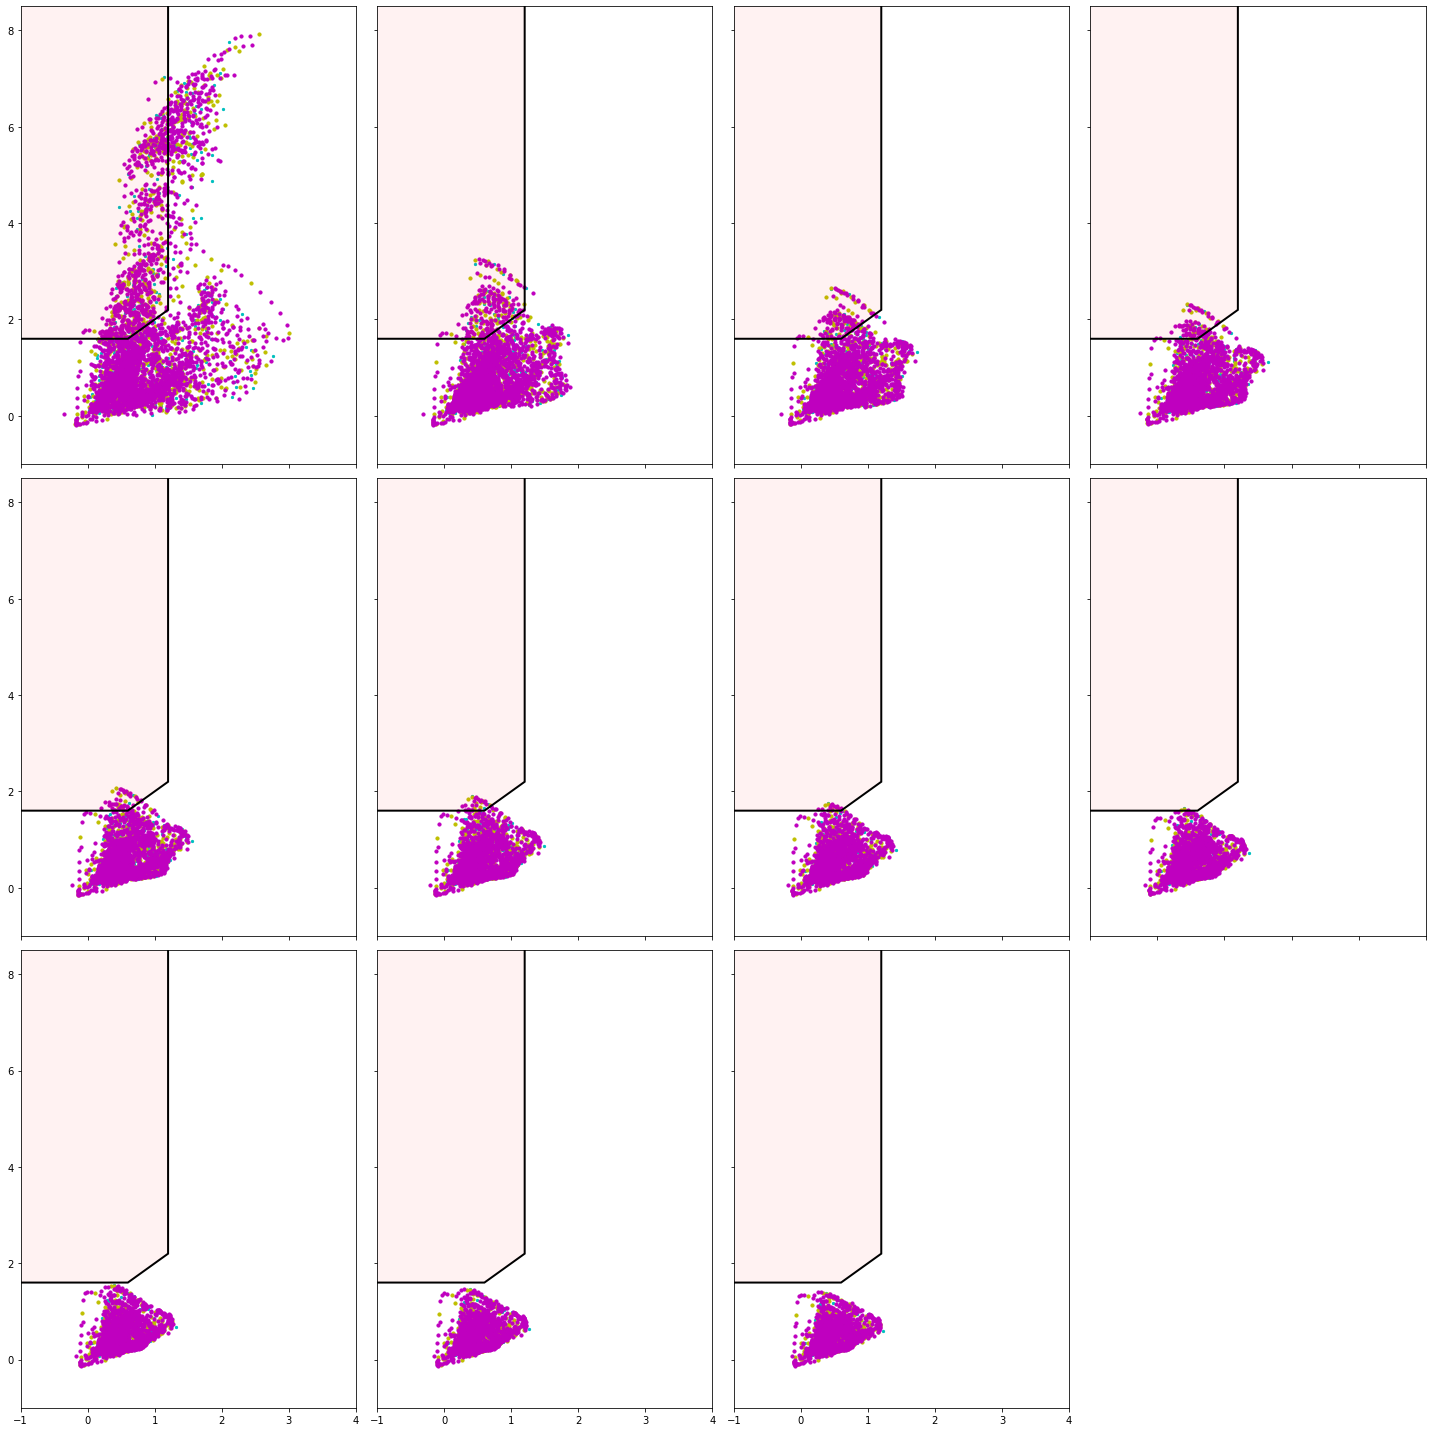

In [95]:
fig, axs = plt.subplots(3, 4, figsize=(20, 20), sharex=True, sharey=True)



for n in range(len(alpha_values)):
    # Get the ug and gr colors for the specific alpha value
    u_col_name = f'u_{int(round(alpha_values[n], 2))}'
    g_col_name = f'g_{int(round(alpha_values[n], 2))}'
    r_col_name = f'r_{int(round(alpha_values[n], 2))}'

    ug_specific_alpha_colours = composite_fluxes[u_col_name] - composite_fluxes[g_col_name]
    gr_specific_alpha_colours = composite_fluxes[g_col_name] - composite_fluxes[r_col_name]

    # Scatter plots with color-coded redshift ranges
    axs[n // 4, n % 4].scatter(gr_specific_alpha_colours[composite_fluxes['z'] > 3.5], 
                               ug_specific_alpha_colours[composite_fluxes['z'] > 3.5], 
                               c="c", s=5, label="z > 3.5")

    axs[n // 4, n % 4].scatter(gr_specific_alpha_colours[(composite_fluxes['z'] > 2.6) & (composite_fluxes['z'] <= 3.5)], 
                               ug_specific_alpha_colours[(composite_fluxes['z'] > 2.6) & (composite_fluxes['z'] <= 3.5)], 
                               c="y", s=10, label="2.6 < z < 3.5")

    axs[n // 4, n % 4].scatter(gr_specific_alpha_colours[composite_fluxes['z'] < 2.6], 
                               ug_specific_alpha_colours[composite_fluxes['z'] < 2.6], 
                               c="m", s=10, label="z < 2.6")
    
    
    plt.xlabel("G-R")
    plt.ylabel("U-G")
    #plt.title("UGR Diagram for SED Templates at Different Redshifts(0 < z < 4) for alpha = {}".format(alphas[n]))

    
    
    # add the alpha value information onto the plot somewhere
    #axs[n//4, n%4].text(0.5, 0.9, f"alpha = {round(alpha[n], 2)}", horizontalalignment='center', verticalalignment='center', transform=axs[n//4, n%4].transAxes)

    # Additionally we can plot the UGR selection criteria on the UGR diagram
    U_rule = [[1.2,9], [1.2,2.2], [0.6,1.6], [-3,1.6], [-3,9]]
    axs[n//4, n%4].add_patch(plt.Polygon(U_rule, closed=True, fill=True, facecolor=(1,0,0,0.05), edgecolor=(0,0,0,1), linewidth=2, linestyle='solid')) # This looks like the correct U dropout technique

    axs[n//4, n%4].set_xlim(-1, 4)
    axs[n//4, n%4].set_ylim(-1, 8.5)
    
    # In addition we can plot a mean position for on each of the alpha plots. This mean value will be the mean of the ugr
# Remove final plot
fig.delaxes(axs[2, 3])

# # Make all the plots touch
# plt.subplots_adjust(wspace=-0.5, hspace=0)

plt.tight_layout()    

if save_figures:
    plt.savefig(f'outputs/UGRPlots/ugr_alpha_{agn_model_name}.png')
    
# Plot
plt.show()
    

In [96]:
# Checkout the colours for the 'z' < 2.5

# check 
composite_fluxes[(composite_fluxes['z'] > 2.6) & (composite_fluxes['z'] < 3.5)]

,id,z,U_0,U_10,U_20,U_30,U_40,U_50,U_60,U_70,...,r_10,r_20,r_30,r_40,r_50,r_60,r_70,r_80,r_90,r_100
27,Arp_118,2.7,-17.053710,-17.124158,-17.190312,-17.252666,-17.311633,-17.367562,-17.420750,-17.471453,...,-19.026071,-19.041709,-19.057124,-19.072324,-19.087314,-19.102100,-19.116687,-19.131081,-19.145286,-19.159308
28,Arp_118,2.8,-17.040113,-17.314230,-17.532904,-17.714833,-17.870608,-18.006811,-18.127817,-18.236679,...,-19.643290,-19.680394,-19.716271,-19.751001,-19.784654,-19.817296,-19.848984,-19.879774,-19.909715,-19.938853
29,Arp_118,2.9,-21.151355,-21.244855,-21.330938,-21.410694,-21.484990,-21.554526,-21.619876,-21.681514,...,-22.819316,-22.846930,-22.873859,-22.900136,-22.925793,-22.950857,-22.975355,-22.999313,-23.022754,-23.045699
30,Arp_118,3.0,-19.789764,-19.907285,-20.013319,-20.109913,-20.198611,-20.280607,-20.356843,-20.428075,...,-22.301606,-22.317826,-22.333808,-22.349558,-22.365083,-22.380389,-22.395483,-22.410369,-22.425054,-22.439543
31,Arp_118,3.1,-15.932698,-15.987490,-16.039650,-16.089419,-16.137006,-16.182594,-16.226345,-16.268402,...,-17.677696,-17.692588,-17.707278,-17.721773,-17.736076,-17.750194,-17.764130,-17.777889,-17.791477,-17.804896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,UM_461,3.0,31.336859,29.737713,29.117330,28.725002,28.437422,28.210282,28.022538,27.862522,...,26.961052,26.862892,26.772875,26.689754,26.612546,26.540465,26.472874,26.409245,26.349139,26.292187
5111,UM_461,3.1,34.172003,33.677300,33.338707,33.080984,32.872853,32.698274,32.547916,32.415870,...,30.541849,30.507349,30.473912,30.441474,30.409977,30.379368,30.349598,30.320623,30.292401,30.264895
5112,UM_461,3.2,36.918610,29.987395,29.235737,28.795815,28.483621,28.241438,28.043546,27.876222,...,28.111268,27.842462,27.627175,27.447594,27.293543,27.158658,27.038694,26.930676,26.832439,26.742357
5113,UM_461,3.3,37.648174,28.907684,28.155282,27.715111,27.402793,27.160536,26.962594,26.795235,...,27.627499,27.196699,26.889097,26.649679,26.453634,26.287633,26.143678,26.016595,25.902840,25.799882


IRAC Diagrams
